# 1. Overview

The project aimed to assist companies in optimizing their marketing strategies by analyzing public sentiment towards technological products through social media data. As a third-party consulting firm, we specialize in helping companies understand which features of their products are most appreciated by consumers, allowing them to adjust their marketing campaigns and product development strategies accordingly. For this project, we focused on analyzing a semi-structured database containing 9,093 tweets, each labeled with a sentiment (positive, negative, neutral, or no emotion) and associated with a technological product from major brands such as Apple and Google.

Our business objective was to identify tweets expressing positive sentiment, as this information is crucial for companies to determine which products are well-received by consumers. We partitioned the dataset into 65% training and 35% testing sets and applied several preprocessing techniques, including tokenization, lemmatization, removal of stopwords, and filtering out rare characters. This allowed us to clean the text data and convert it into a structured format for analysis.

We tested multiple machine learning models, including Logistic Regression, XGBoost, Random Forest, and Neural Networks. After comparing performance, we selected XGBoost as the final model due to its superior results. Using the precision score to evaluate model performance, we achieved 0.78 on the training set and 0.67 on the test set. The XGBoost model was then deployed to accurately identify tweets with positive sentiment, providing key insights for companies to enhance their product strategies based on consumer feedback.

# 2. Business Understanding

We are a third-party consulting firm specializing in analyzing public sentiment toward technological products for companies seeking to optimize their marketing strategies and product management. Companies approach us to understand which features of their technological products are most appreciated by the general public. This insight allows these companies to fine-tune their marketing campaigns and adjust their product development strategies to align with consumer preferences, ultimately driving higher customer satisfaction and business success.

Our core offering revolves around leveraging advanced machine learning and artificial intelligence models to analyze user-generated content, specifically tweets, that discuss various technological products. By utilizing these models, we are able to detect and classify the sentiment behind each tweet—whether it is positive or non-positive. This sentiment analysis is crucial in helping our clients understand how their products are perceived in the market.

The process begins by collecting and preprocessing large volumes of tweets related to specific technological products from different companies. Our models are then trained to recognize patterns in the language and context used in these tweets, allowing us to automatically identify positive and non-positive sentiments. For example, a tweet praising the design or functionality of a product would be classified as having a positive sentiment, while a tweet expressing dissatisfaction with the same product would fall under non-positive sentiment.

In this project, we have focused on identifying the overall sentiment toward technological products, but the next step would involve providing detailed reports on which specific features of these products are receiving the most positive feedback. Offering such insights would enable our clients to make data-driven decisions to optimize their product offerings by emphasizing the features that resonate most with consumers and addressing any pain points or negative feedback. While this analysis is not part of the current scope, it would lay the groundwork for more effective marketing strategies and product management, helping our clients remain competitive in an ever-evolving technological landscape.

# 3. Data Understanding

## 3.1 Data Description

The dataset consists of 9,093 tweets related to technological products, each labeled with one of four sentiment categories: positive, negative, neutral, or no emotion. In addition to sentiment, each tweet is associated with a specific technological product from brands such as Apple or Google.

The dataset can be found in this site: https://data.world/crowdflower/brands-and-product-emotions

For a more detailed description of the entire process, please go to the notebook 01_data_understanding via this link:
[Go to Notebook 01_data_understanding.ipynb](01_data_understanding.ipynb).

## 3.2 Import necessary libraries

In [1]:
# pip install dill

In [2]:
from collections import Counter
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import TransformerMixin
from nltk.corpus import wordnet
from utils_function import * # This contains a .py file with the functions used in this notebook
import dill
import pickle
import category_encoders as ce
import pickle
import pandas as pd
import numpy as np
import re
import seaborn as sns
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4') 

import warnings
# Suppress all warnings
warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to C:\Users\Usuario/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Usuario/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Usuario/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Usuario/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Usuario/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.

## 3.3 Code

### 3.3.1 Exploratory Analysis

#### 3.3.1.1 Looking at the dataset

In [3]:
df_tweets = pd.read_csv('..\data\judge-1377884607_tweet_product_company.csv', encoding='ISO-8859-1')
df_tweets.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
df_tweets.shape

(9093, 3)

#### 3.3.1.2 Looking at the data types

In [5]:
# Let's start by having a look at the type of each column
df_tweets.dtypes

tweet_text                                            object
emotion_in_tweet_is_directed_at                       object
is_there_an_emotion_directed_at_a_brand_or_product    object
dtype: object

#### 3.3.1.3 Null values

In [6]:
# Let's see how the proportion of null values
(df_tweets.isna().sum()/len(df_tweets))*100

tweet_text                                             0.010997
emotion_in_tweet_is_directed_at                       63.807324
is_there_an_emotion_directed_at_a_brand_or_product     0.000000
dtype: float64

### 3.3.2 Descriptive Analysis

#### 3.3.2.1 Univaried Analysis

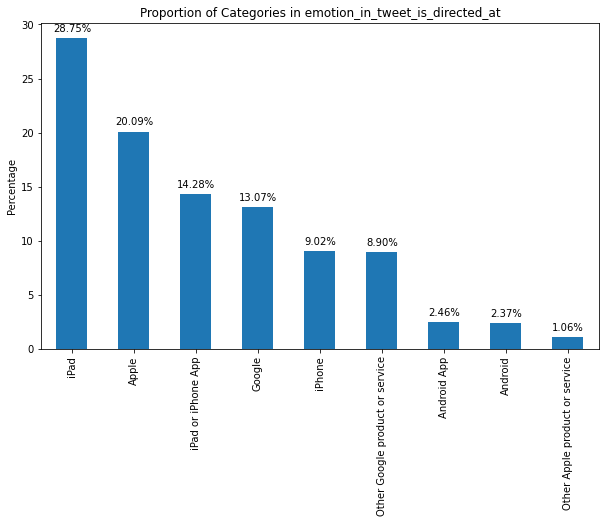

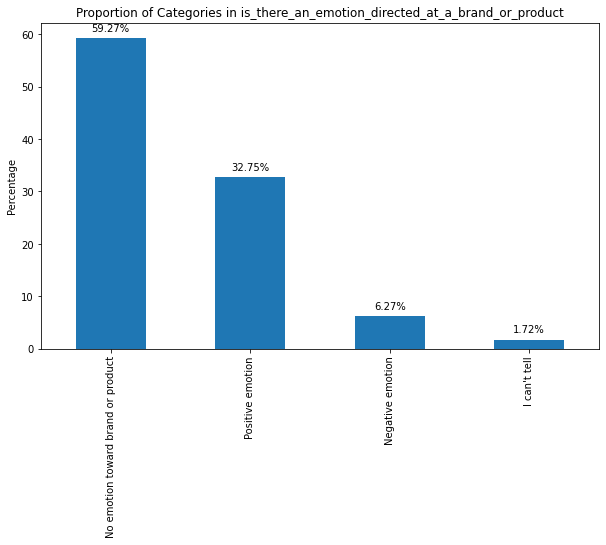

In [7]:
plot_categorical_proportions(df_tweets)

As we can see in the column emotion_in_tweet_is_directed_at, most of the tweets are about iPad or Apple devices. However, there are labels marked as different but that are actually talking about the same category. For example, Android and Android App.

Regarding the is_there_an_emotion_directed_at_a_brand_or_product variable, we can see that only 39.02% of the tweets have actually either a positive or negative emotion.

We decide to create a function capable of identifying, based on the tweet, which device it's talking about (ie, Google or Apple). And we create a new column with that classification

In [8]:
# Apply the function to the DataFrame and create a new column with the results
df_tweets['product_mention'] = df_tweets['tweet_text'].map(identify_product)

As defined in our business problem, we have decided not to filter any of the labels in the product_mention field because we believe that the values Both and Unknown can provide us with relevant information.

In [9]:
# We will now drop the column emotion_in_tweet_is_directed_at
df_tweets = df_tweets.drop('emotion_in_tweet_is_directed_at', axis=1)

We conclude that we can trust the is_there_an_emotion_directed_at_a_brand_or_product labels in the dataset. Let's rename the column is_there_an_emotion_directed_at_a_brand_or_product to emotion_type

In [10]:
df_tweets.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion_type'}, inplace=True)

In [11]:
df_tweets.head()

,tweet_text,emotion_type,product_mention
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,Apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,Apple
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,Apple
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,Apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,Google


In [12]:
df_tweets['emotion_type'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: emotion_type, dtype: int64

Let's rename the value 'No emotion toward brand or product' for 'unknown'

In [13]:
# Replace values in column 'emotion_type' where the value is "No emotion toward brand or product" with "no emotion"
df_tweets['emotion_type'] = df_tweets['emotion_type'].replace("No emotion toward brand or product", "no emotion")

We are going to do a replace of every emotion that is not positive to 'no positive' and leave the positive emotions as they are

In [14]:
df_tweets['emotion_type'] = df_tweets['emotion_type'].map(lambda x: 'Positive emotion' if x=='Positive emotion' else 'Not Positive emotion')

Let's see the univaried results after this new updates on df_tweets

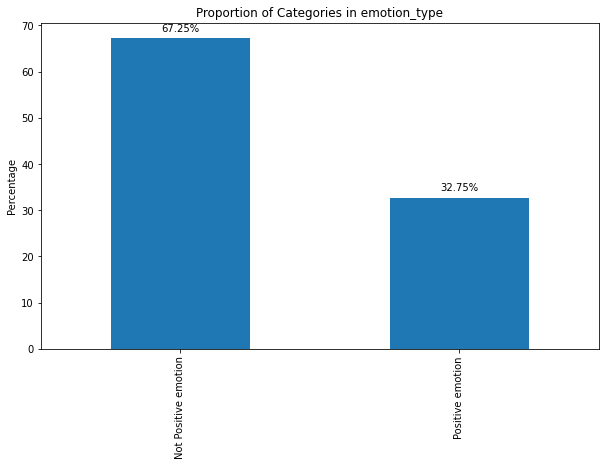

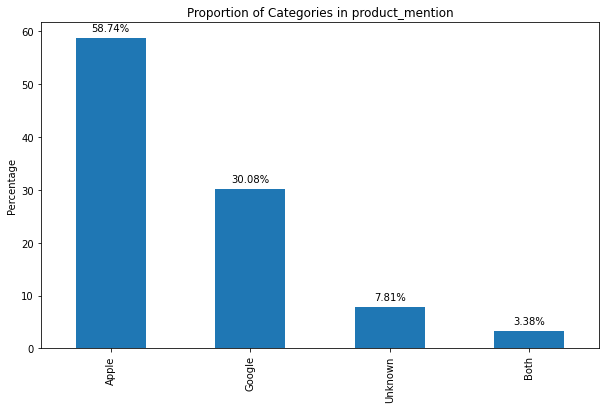

In [15]:
plot_categorical_proportions(df_tweets)

**Categorical Columns**

### 3.3.2.2. Multivaried Analysis

Let's see the distribution of the sentiments for each company

**Bar graph**

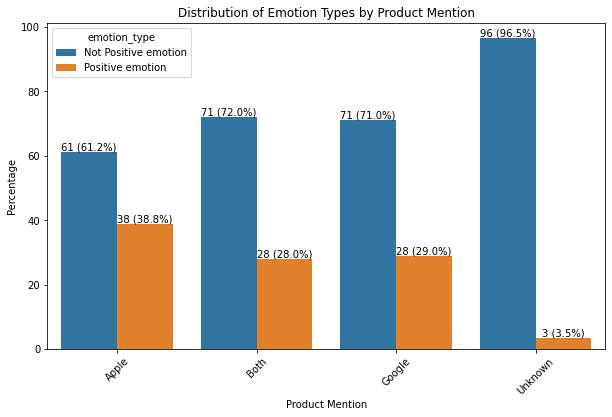

In [16]:
plot_emotion_distribution(df_tweets)

After looking at this graph, we are going to filter the unknowns because it's not giving us much information and it's not in our interests

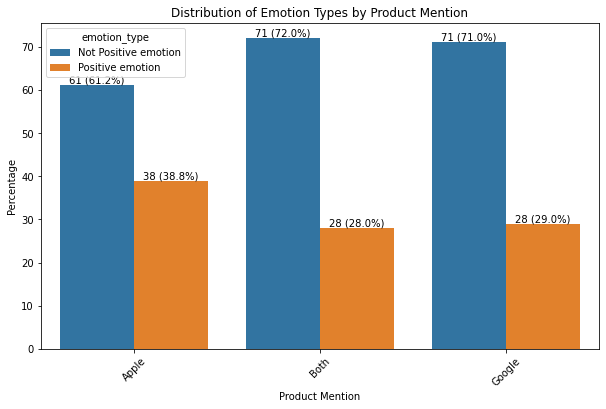

In [17]:
# Filter out rows where product_mention is 'Unknown'
df_tweets = df_tweets[df_tweets['product_mention'] != 'Unknown']

plot_emotion_distribution(df_tweets)

As is observable in the image above, we don't have a problem of imbalance in our data as we usually use 3% as the threshold.

**Contingency Tables**

In [18]:
contingency_table_percentage = get_contingency_table_with_percentage_sign(df_tweets)

contingency_table_percentage

emotion_type,Not Positive emotion,Positive emotion
product_mention,,
Apple,61.17%,38.83%
Both,71.99%,28.01%
Google,71.01%,28.99%


# 4. Data Preparation

Once we have seen the data structure and characteristics, as our primary source of information are the tweets we need to preprocess them in order to get the features from our modelling. 

For a more detailed description of the entire process, please go to the notebook 02_data_preprocessing via this link:
[Go to Notebook 02_data_preprocessing.ipynb](02_data_preprocessing.ipynb).

## 4.1 Text Cleaning

We are now going to process the text in the column 'tweet_text' of a dataframe by applying several steps:
 1. Lowercasing all text.
 2. Replacing product names, user tags, hashtags, and URLs with general terms.
 3. Removing stopwords.
 4. Removing strange characters and punctuation.
 5. Removing numbers.
 6. Eliminating single-letter words.
 7. Lemmatizing words.
 8. Tokenizing the text.


In [19]:
df = tweet_text_treatment(df_tweets,'tweet_text')

df

,tweet_text,emotion_type,product_mention,tweet_text_tokenized
0,user monetwork tecproduct hr tweeting trend de...,Not Positive emotion,Apple,"[user, monetwork, tecproduct, hr, tweeting, tr..."
1,user know user awesome tecproduct tecproduct a...,Positive emotion,Apple,"[user, know, user, awesome, tecproduct, tecpro..."
2,user wait tecproduct also sale trend,Positive emotion,Apple,"[user, wait, tecproduct, also, sale, trend]"
3,user hope year festival crashy year tecproduct...,Not Positive emotion,Apple,"[user, hope, year, festival, crashy, year, tec..."
4,user great stuff fri trend marissa mayer tecpr...,Positive emotion,Google,"[user, great, stuff, fri, trend, marissa, maye..."
...,...,...,...,...
9088,tecproduct everywhere trend link,Positive emotion,Apple,"[tecproduct, everywhere, trend, link]"
9089,wave buzz rt user interrupt regularly schedule...,Not Positive emotion,Google,"[wave, buzz, rt, user, interrupt, regularly, s..."
9090,tecproduct zeiger physician never reported pot...,Not Positive emotion,Google,"[tecproduct, zeiger, physician, never, reporte..."
9091,verizon tecproduct customer complained time fe...,Not Positive emotion,Apple,"[verizon, tecproduct, customer, complained, ti..."


## 4.2 Train test split 

Let's first define our variables

In [20]:
y = df['emotion_type']
X = df.drop(['emotion_type'], axis=1)

We are going to transform the variable y to numeric. Because all models need their target to be numeric. We will use the LabelEncoder.

In [21]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder and transform the 'emotion_type' column
df['emotion_type_encoded'] = label_encoder.fit_transform(df['emotion_type'])

# The result is a new column 'emotion_type_encoded' with numeric values
y = df['emotion_type_encoded']

In [22]:
# X is the feature set and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

Let's compare the shapes of y_test and y_train to see if they're somewhat similar

In [23]:
y_test.value_counts(normalize=True)

0    0.655877
1    0.344123
Name: emotion_type_encoded, dtype: float64

In [24]:
y_train.value_counts(normalize=True)

0    0.643355
1    0.356645
Name: emotion_type_encoded, dtype: float64

Let's see a description of the distributions

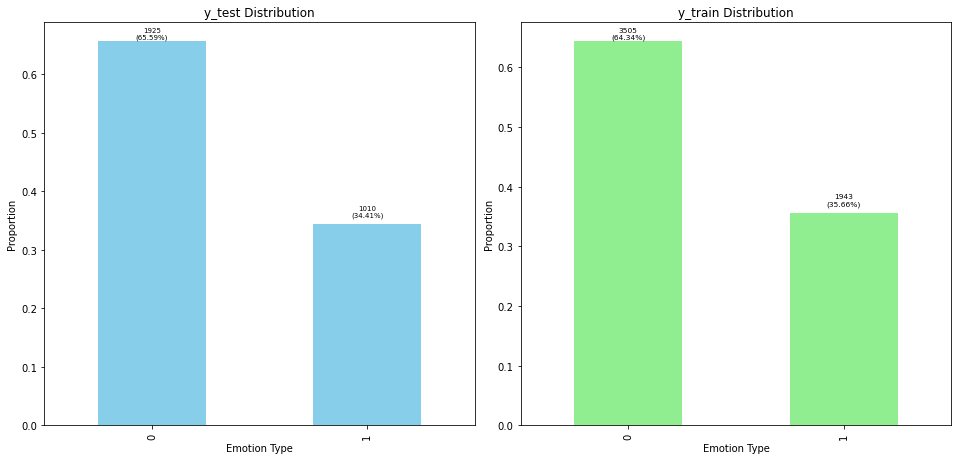

In [25]:
# Create a larger figure
plt.figure(figsize=(14, 7))

# y_test Distribution
plt.subplot(1, 2, 1)
y_test_counts = y_test.value_counts(normalize=True)
y_test_abs_counts = y_test.value_counts()

y_test_counts.plot(kind='bar', color='skyblue')
plt.title('y_test Distribution')
plt.xlabel('Emotion Type')
plt.ylabel('Proportion')

for i, (count, pct) in enumerate(zip(y_test_abs_counts, y_test_counts)):
    vertical_position = pct + 0.002 if pct > 0.5 else pct + 0.01  # Small offset for larger bars
    plt.text(i, vertical_position, f'{count}\n({pct:.2%})', ha='center', va='bottom', fontsize=7)

# y_train Distribution
plt.subplot(1, 2, 2)
y_train_counts = y_train.value_counts(normalize=True)
y_train_abs_counts = y_train.value_counts()

y_train_counts.plot(kind='bar', color='lightgreen')
plt.title('y_train Distribution')
plt.xlabel('Emotion Type')
plt.ylabel('Proportion')

for i, (count, pct) in enumerate(zip(y_train_abs_counts, y_train_counts)):
    vertical_position = pct + 0.002 if pct > 0.5 else pct + 0.01  # Small offset for larger bars
    plt.text(i, vertical_position, f'{count}\n({pct:.2%})', ha='center', va='bottom', fontsize=7.5)

# Adjust layout to make more space around the plots
plt.tight_layout()
plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1)
plt.show()


# 5. Modelling

After trying several models such as Logistic Regression, XGBoost, Random Forest, and Neural Networks; we used the precision score to compare performance among the models and we selected XGBoost as the final model due to its superior results. We achieved 0.78 on the training set and 0.67 on the test set. The XGBoost model was then deployed to accurately identify tweets with positive sentiment, providing key insights for companies to enhance their product strategies based on consumer feedback.

Below there is a table comparing the precision values for train and test of all the models that were tested with:

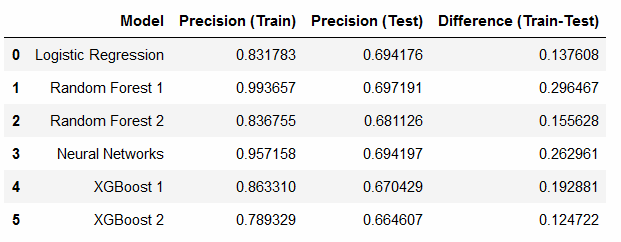

For a more detailed description of the entire process, please go to the notebook 03_data_modelling via this link:
[Go to Notebook 03_modelling.ipynb](03_modelling.ipynb).

In section 6, we are going to import the best model that we mentioned in this section 5, to be able to do future predictions.

# 6. Pipeline

We will implement a machine learning pipeline that combines multiple preprocessing steps with a classification model. The pipeline includes the following stages:

1. TF-IDF Transformation: First, we apply a TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer to convert the text data into a numerical format by weighing the importance of each word in the dataset, based on its frequency across different documents.

2. One-Hot Encoding: If categorical features are present, we apply One-Hot Encoding to convert categorical variables into a binary format that machine learning algorithms can process. This ensures that each category is represented as a separate feature.

3. XGBoost: Finally, the pipeline feeds the preprocessed data into the best-performing model chosen during the model selection process, which is a XGBoost. The model has been optimized based on the precision metric, ensuring that the classification performance prioritizes minimizing false positives and maximizing precision, especially important in scenarios with imbalanced data.

This pipeline automates the preprocessing and modeling workflow, making the process efficient and ensuring consistency across different data inputs.

In [27]:
# Load the pickles
with open('..\pickle_objects/tfidf_vectorizer.pkl', 'rb') as f:
    tfidf_vectorizer = pickle.load(f)

with open('..\pickle_objects/ohe.pkl', 'rb') as f:
    ohe = pickle.load(f)

with open('..\pickle_objects/model.pkl', 'rb') as f:
    model = pickle.load(f)

Now we are going to create the pipeline with the pickles aforementioned

In [28]:
pipeline = Pipeline([
    ('preprocessing', ColumnTransformer(
        transformers=[
            # Apply TF-IDF to 'tweet_text' and convert it to a DataFrame with feature names
            ('tfidf', Pipeline([
                ('tfidf_vectorizer', tfidf_vectorizer),
                ('to_df', TfidfToDataFrame(tfidf_vectorizer))  # Convert TF-IDF to DataFrame with feature names
            ]), 'tweet_text'),
            
            # Apply OneHotEncoder to 'product_mention'
            ('onehot', ohe, ['product_mention'])
        ],
        remainder='drop'  # Drop columns that are unnecessary
    )),
    
#     XGB model for prediction
    ('XGB', model)
])

We are now going to fit the pipeline

In [29]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('tfidf',
                                                  Pipeline(steps=[('tfidf_vectorizer',
                                                                   TfidfVectorizer()),
                                                                  ('to_df',
                                                                   <utils_function.TfidfToDataFrame object at 0x000001CFE7280820>)]),
                                                  'tweet_text'),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False,
                                                                sparse_output=False),
                                                  ['product_mention'])])),
                ('XGB',
                 XGBClassifier(base_score=None, boo...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

We shall now save the pipeline

In [31]:
# Save the pipeline using dill
with open('..\pickle_objects/pipeline.pkl', 'wb') as file:
    dill.dump(pipeline, file)

We are now going to try the pipeline to confirm that it works well

In [32]:
with open('..\pickle_objects/pipeline.pkl', 'rb') as f:
    pipeline = dill.load(f)

In [33]:
y_pred_proba = pipeline.predict_proba(X_test)[:,1]

y_pred_proba

array([0.41029614, 0.56931895, 0.31938112, ..., 0.33070973, 0.74351907,
       0.26638216], dtype=float32)

Let's now use the threshold to convert the probabilities into binary predictions

In [34]:
# Apply custom threshold to convert probabilities into binary predictions for test data
y_pred = np.where(y_pred_proba >= 0.34, 1, 0)

y_pred

array([1, 1, 0, ..., 0, 1, 0])

Now let's look at the results of the confusion matrix to check they are the same as the one shown in notebook 03_modelling

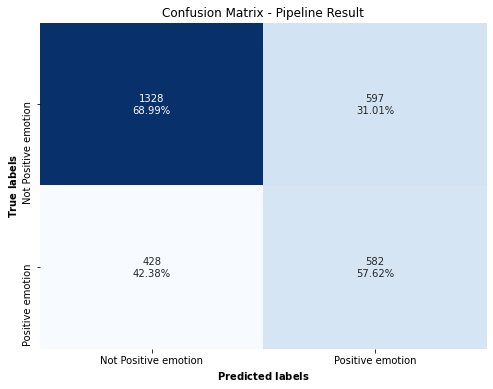

Weighted Precision: 0.67
Weighted Recall: 0.65
Weighted F1 Score: 0.66


In [35]:
plot_confusion_matrix_and_metrics(y_test, y_pred, title='Confusion Matrix - Pipeline Result');

As can be seen, when comparing this confusion matrix with the one shown in notebook 03 the results are the same.

# 7. Evaluation

We have built the best model to detect tweets with positive sentiment, achieving 58% success by optimizing for precision. Our focus is to avoid mistakes when identifying a tweet as having a positive emotion. The reason for this is tied to our business case and the next steps of this project, which involve distinguishing the characteristics of technological products that evoke positive emotions in the public. If we fail to minimize false positives, this would negatively impact our future model aimed at identifying the features of a technological product that trigger positive emotions.

This model enables us to gain reasonable insights when extracting positive features from tweets. By focusing on precision, we ensure that the positive sentiment tweets we identify are highly likely to reflect genuine positivity, which is crucial for the reliability of subsequent analyses.

In the future, the company's intention is that once the positive tweets are extracted, a model will be built to determine the characteristics of technological products that lead to positive sentiment towards the product. This approach will provide deeper insights into what aspects of these products resonate positively with the audience, further enhancing our overall analysis.

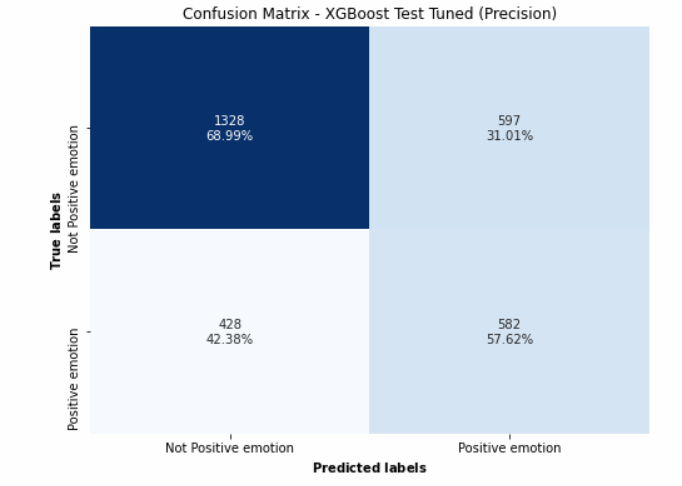

As seen in the confusion matrix, a false positive rate of 31.01% in predicting positive sentiment means that a notable portion of non-positive tweets are incorrectly classified as positive. This could impact companies' understanding of consumer feedback. However, with a true positive rate of 57.62%, the model effectively identifies over half of the positive sentiment tweets, providing valuable insights for marketing and product strategies.

To improve these results, we could focus on two key areas:

- First, increasing the size of the training dataset would allow the model to learn from more examples, improving its ability to generalize. It's also important to increase the number of tweets with positive sentiment, as the dataset is currently imbalanced with more non-positive tweets. A more balanced dataset would prevent the model from becoming biased towards the majority class, ensuring a fair representation of both positive and non-positive sentiments.

- Second, incorporating bigrams or trigrams (n-grams) would enable the model to capture word dependencies that are not evident with single tokens, thus enhancing its ability to identify sentiment patterns more accurately.